In [18]:
path = "MBAR_estimates_with_boots.csv"
path2 = "cychex_simulated_obs_partial.csv"

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [93]:
df = pd.read_csv(path, sep=';').reset_index(drop=True)
#print df.columns
df2 = pd.read_csv(path2, sep=';').reset_index(drop=True)

In [94]:
df['state_coords'] = df['epsilon values'].astype(str) +','+ df['rmin_half values'].astype(str)
df2['state_coords'] = df2['eps_val'].astype(str)+','+df2['rmin_half_val'].astype(str)

dfcomp = df[df.state_coords.isin(df2.state_coords)].drop_duplicates(['state_coords']).reset_index()
dfcomp = dfcomp.set_index('state_coords')
df2 = df2.set_index('state_coords')
dfcomp = dfcomp.reindex(df2.index)

#print dfcomp.index, df2.index

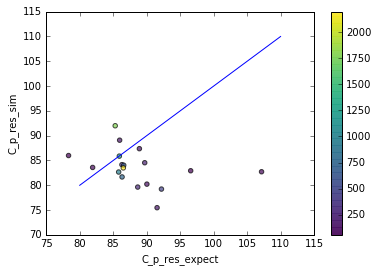

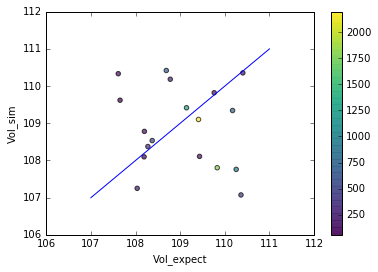

In [100]:
plt.figure()
plt.scatter(dfcomp['C_p_res_expect (J/mol/K)'],df2['C_p_res_sim (J/mol/K)'],c=dfcomp['N_eff'],cmap='viridis',alpha=0.7)
plt.plot([80,110],[80,110])
plt.xlim([75,115])
plt.ylim([70,115])
plt.xlabel('C_p_res_expect')
plt.ylabel('C_p_res_sim')
plt.colorbar()
plt.savefig('Cp_res_sim_MBAR_parity.jpg',dpi=300)

plt.figure()
plt.scatter(dfcomp['Vol_expect (mL/mol)'],df2['Vol_sim (mL/mol)'],c=dfcomp['N_eff'],cmap='viridis',alpha=0.7)
plt.plot([107,111],[107,111])
#plt.xlim([75,115])
#plt.ylim([70,115])
plt.xlabel('Vol_expect')
plt.ylabel('Vol_sim')
plt.colorbar()
plt.savefig('Vol_sim_MBAR_parity.jpg',dpi=300)

# Pascal's ensemble validation
# Error bars
# Are simulation results smooth functions?
# MBAR results with N_eff > half of total subsampled frames should be pretty exactly spot on
# Update methods in paper outline


In [101]:
df = df[df['N_eff']>=50].reset_index()

In [97]:
df.describe()


,index,Unnamed: 0,C_p_res_bootstrap (J/mol/K),C_p_res_expect (J/mol/K),N_eff,Vol_bootstrap (mL/mol),Vol_expect (mL/mol),dC_p_res_bootstrap (J/mol/K),dC_p_res_expect (J/mol/K),dVol_bootstrap (mL/mol),dVol_expect (mL/mol),epsilon values,rmin_half values
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000
mean,119.721311,119.721311,105.394037,88.864856,790.648123,109.410301,109.250446,0.048703,7.874230,3.590828e-04,0.062856,0.109826,1.910041
std,69.558608,69.558608,21.424229,6.220952,750.349312,0.006658,0.930911,0.049320,6.163178,2.512654e-04,0.043480,0.003544,0.009059
min,0.000000,0.000000,86.367129,76.054488,55.391690,109.383223,107.613141,0.000231,2.802935,7.105427e-17,0.021085,0.102200,1.887000
25%,55.500000,55.500000,87.621354,85.815459,165.098467,109.407449,108.503403,0.014093,3.868023,1.764696e-04,0.030012,0.107600,1.904500
50%,119.000000,119.000000,96.713026,86.776802,467.596621,109.411126,109.406088,0.032308,6.303797,3.637615e-04,0.050971,0.109400,1.908000
75%,177.500000,177.500000,117.214833,90.771608,1215.354221,109.413693,109.793822,0.065337,8.689707,5.451216e-04,0.078412,0.112600,1.917000
max,239.000000,239.000000,175.100173,110.391290,2198.000000,109.427756,111.487238,0.273782,33.860645,9.860038e-04,0.224944,0.115700,1.926000


In [98]:
df['dC_p_res_bootstrap (J/mol/K)'] = df['dC_p_res_bootstrap (J/mol/K)']*np.sqrt(200.)
df['dVol_bootstrap (mL/mol)'] = df['dVol_bootstrap (mL/mol)']*np.sqrt(200.)

df['dC_p_res_expect (J/mol/K)'] = df['dC_p_res_expect (J/mol/K)']/np.sqrt(250.)
df['dVol_expect (mL/mol)'] = df['dVol_expect (mL/mol)']/np.sqrt(250.)


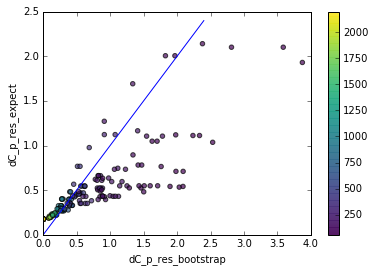

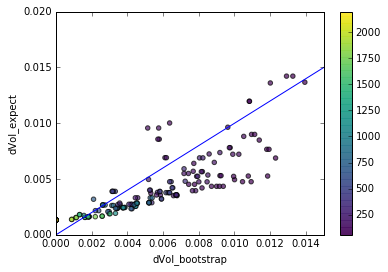

In [99]:
plt.figure()
plt.scatter(df['dC_p_res_bootstrap (J/mol/K)'],df['dC_p_res_expect (J/mol/K)'],c=df['N_eff'],cmap='viridis',alpha=0.7)
plt.plot([0,2.4],[0,2.4])
plt.xlim([0,4.0])
plt.ylim([0,2.5])
plt.xlabel('dC_p_res_bootstrap')
plt.ylabel('dC_p_res_expect')
plt.colorbar()
plt.savefig('dCp_res_parity.jpg',dpi=300)

plt.figure()
plt.scatter(df['dVol_bootstrap (mL/mol)'],df['dVol_expect (mL/mol)'],c=df['N_eff'],cmap='viridis',alpha=0.7)
plt.plot([0,1],[0,1])
plt.xlim([0,0.015])
plt.ylim([0,0.02])
plt.xlabel('dVol_bootstrap')
plt.ylabel('dVol_expect')
plt.colorbar()
plt.savefig('dVol_parity.jpg',dpi=300)

In [128]:
eps = np.array(df['epsilon values'])
rmin_half = np.array(df['rmin_half values'])

eps_ = np.array(sorted(list(set(eps))))
rmin_half_ = np.array(sorted(list(set(rmin_half))))

empty_matrix = lambda : np.zeros((len(eps_), len(rmin_half_)))

C_p = empty_matrix()
vol = empty_matrix()

dC_p = empty_matrix()
dvol = empty_matrix()

C_p_boot = empty_matrix()
vol_boot = empty_matrix()

dC_p_boot = empty_matrix()
dvol_boot = empty_matrix()

n_eff = empty_matrix()

eps_dict = {}
for i in range(len(eps_)):
    eps_dict[eps_[i]] = i
rmin_half_dict = {}
for i in range(len(rmin_half_)):
    rmin_half_dict[rmin_half_[i]] = i

for ind in range(len(eps)):
    i = eps_dict[eps[ind]]
    j = rmin_half_dict[rmin_half[ind]]
    
    C_p[i,j] = df['C_p_res_expect (J/mol/K)'][ind]
    vol[i,j] = df['Vol_expect (mL/mol)'][ind]
    
    dC_p[i,j] = df['dC_p_res_expect (J/mol/K)'][ind]/np.sqrt(250.)
    dvol[i,j] = df['dVol_expect (mL/mol)'][ind]/np.sqrt(250.)
    
    
    C_p_boot[i,j] = df['C_p_res_bootstrap (J/mol/K)'][ind]
    vol_boot[i,j] = df['Vol_bootstrap (mL/mol)'][ind]
    
    dC_p_boot[i,j] = df['dC_p_res_bootstrap (J/mol/K)'][ind]*np.sqrt(250.)
    dvol_boot[i,j] = df['dVol_bootstrap (mL/mol)'][ind]*np.sqrt(250.)
    
    n_eff[i,j] = df['N_eff'][ind]

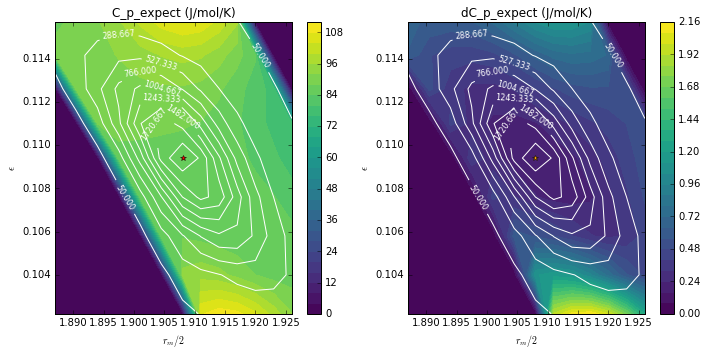

In [129]:
def add_axis_labels_and_colorbar():
    plt.xlabel(r"$r_m / 2$")
    plt.ylabel(r"$\epsilon$")
    plt.colorbar()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('C_p_expect (J/mol/K)')
levels = np.linspace(50,np.max(n_eff),10)
neff1 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff1, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, C_p, 30, cmap = 'viridis')
#plt.imshow(rmin_half_, eps_, C_p)#, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'*',color='red')
add_axis_labels_and_colorbar()

plt.subplot(1,2,2)
plt.title('dC_p_expect (J/mol/K)')
neff2 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff2, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, dC_p, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'*',color='orange')
add_axis_labels_and_colorbar()

plt.tight_layout()
plt.savefig("c_p_expect.jpg", dpi=300)

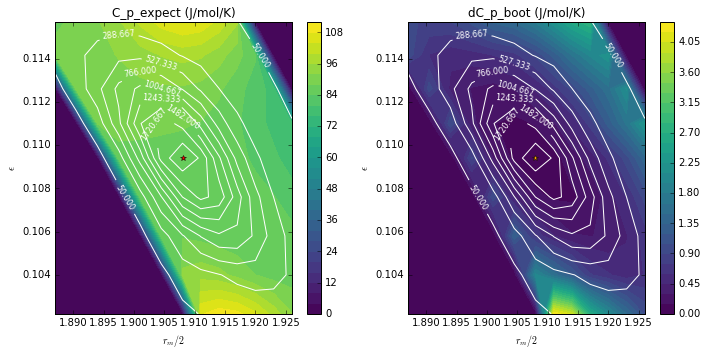

In [127]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('C_p_expect (J/mol/K)')
levels = np.linspace(50,np.max(n_eff),10)
neff1 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff1, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, C_p, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'*',color='red')
add_axis_labels_and_colorbar()

plt.subplot(1,2,2)
plt.title('dC_p_boot (J/mol/K)')
neff2 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff2, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, dC_p_boot, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'*',color='orange')
add_axis_labels_and_colorbar()

plt.tight_layout()
plt.savefig("c_p_boot.jpg", dpi=300)

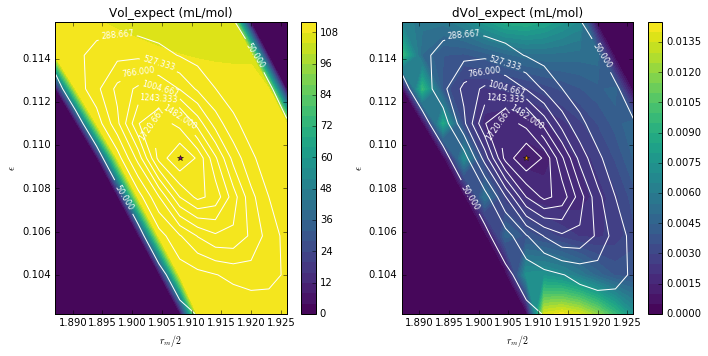

In [130]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Vol_expect (mL/mol)')
neff3 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff3, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, vol, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'*',color='purple')
add_axis_labels_and_colorbar()

plt.subplot(1,2,2)
plt.title('dVol_expect (mL/mol)')
neff4 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff4, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, dvol, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'*',color='orange')
add_axis_labels_and_colorbar()

plt.tight_layout()
plt.savefig("vol_expect.jpg", dpi=300)

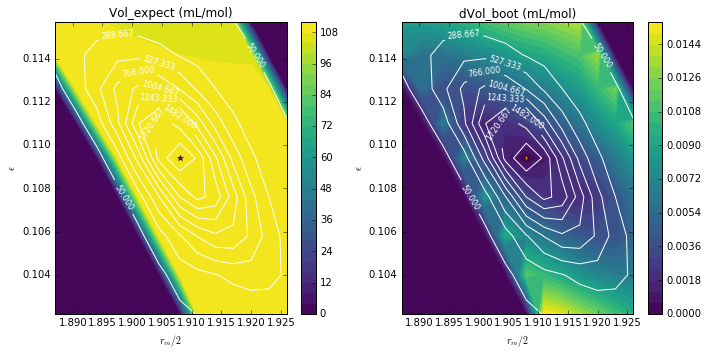

In [131]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Vol_expect (mL/mol)')
neff3 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff3, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, vol, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'*',color='purple')
add_axis_labels_and_colorbar()

plt.subplot(1,2,2)
plt.title('dVol_boot (mL/mol)')
neff4 = plt.contour(rmin_half_, eps_, n_eff, levels = levels, colors = 'w')
plt.clabel(neff4, inline=1, fontsize=8)
plt.contourf(rmin_half_, eps_, dvol_boot, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'*',color='orange')
add_axis_labels_and_colorbar()

plt.tight_layout()
plt.savefig("vol_boot.jpg", dpi=300)

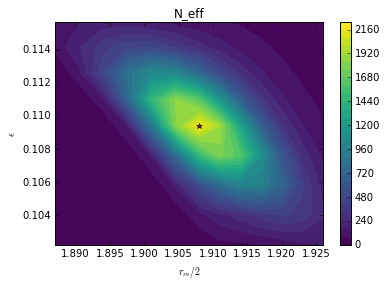

In [105]:
plt.title('N_eff')
plt.contourf(rmin_half_, eps_, n_eff, 30, cmap = 'viridis')
plt.plot(1.908,0.1094,'*',color='purple')
add_axis_labels_and_colorbar()
plt.savefig("n_eff.jpg", dpi=300)

C:\Users\Bryce Manubay\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


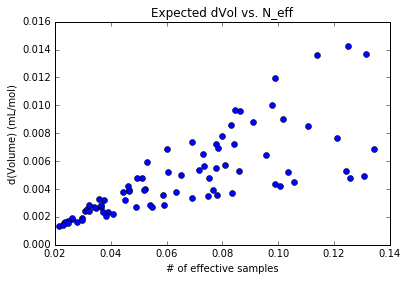

In [137]:
plt.title('Expected dVol vs. N_eff')
plt.plot(1/np.sqrt(n_eff),dvol,'bo')
plt.xlabel('1 / sqrt(# of effective samples)')
plt.ylabel('d(Volume) (mL/mol)')
plt.savefig('dvol_vs_neff.jpg', dpi=300)

C:\Users\Bryce Manubay\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


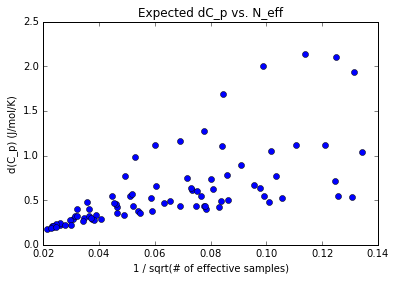

In [138]:
plt.title('Expected dC_p vs. N_eff')
plt.plot(1/np.sqrt(n_eff),dC_p,'bo')
plt.xlabel('1 / sqrt(# of effective samples)')
plt.ylabel('d(C_p) (J/mol/K)')
plt.savefig('dCp_vs_neff.jpg', dpi=300)

C:\Users\Bryce Manubay\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


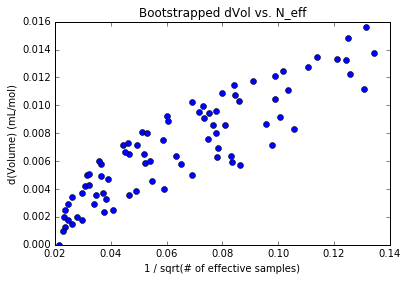

In [141]:
plt.title('Bootstrapped dVol vs. N_eff')
plt.plot(1/np.sqrt(n_eff),dvol_boot,'bo')
plt.xlabel('1 / sqrt(# of effective samples)')
plt.ylabel('d(Volume) (mL/mol)')
plt.savefig('dvol_boot_vs_neff.jpg', dpi=300)

C:\Users\Bryce Manubay\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


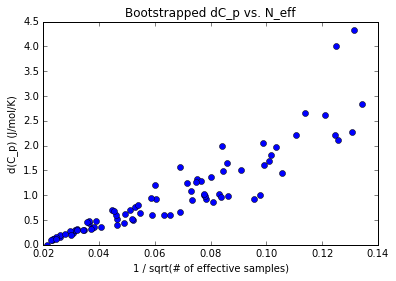

In [144]:
plt.title('Bootstrapped dC_p vs. N_eff')
plt.plot(1/np.sqrt(n_eff),dC_p_boot,'bo')
plt.xlabel('1 / sqrt(# of effective samples)')
plt.ylabel('d(C_p) (J/mol/K)')
plt.savefig('dCp_boot_vs_neff.jpg', dpi=300)